# DSLR

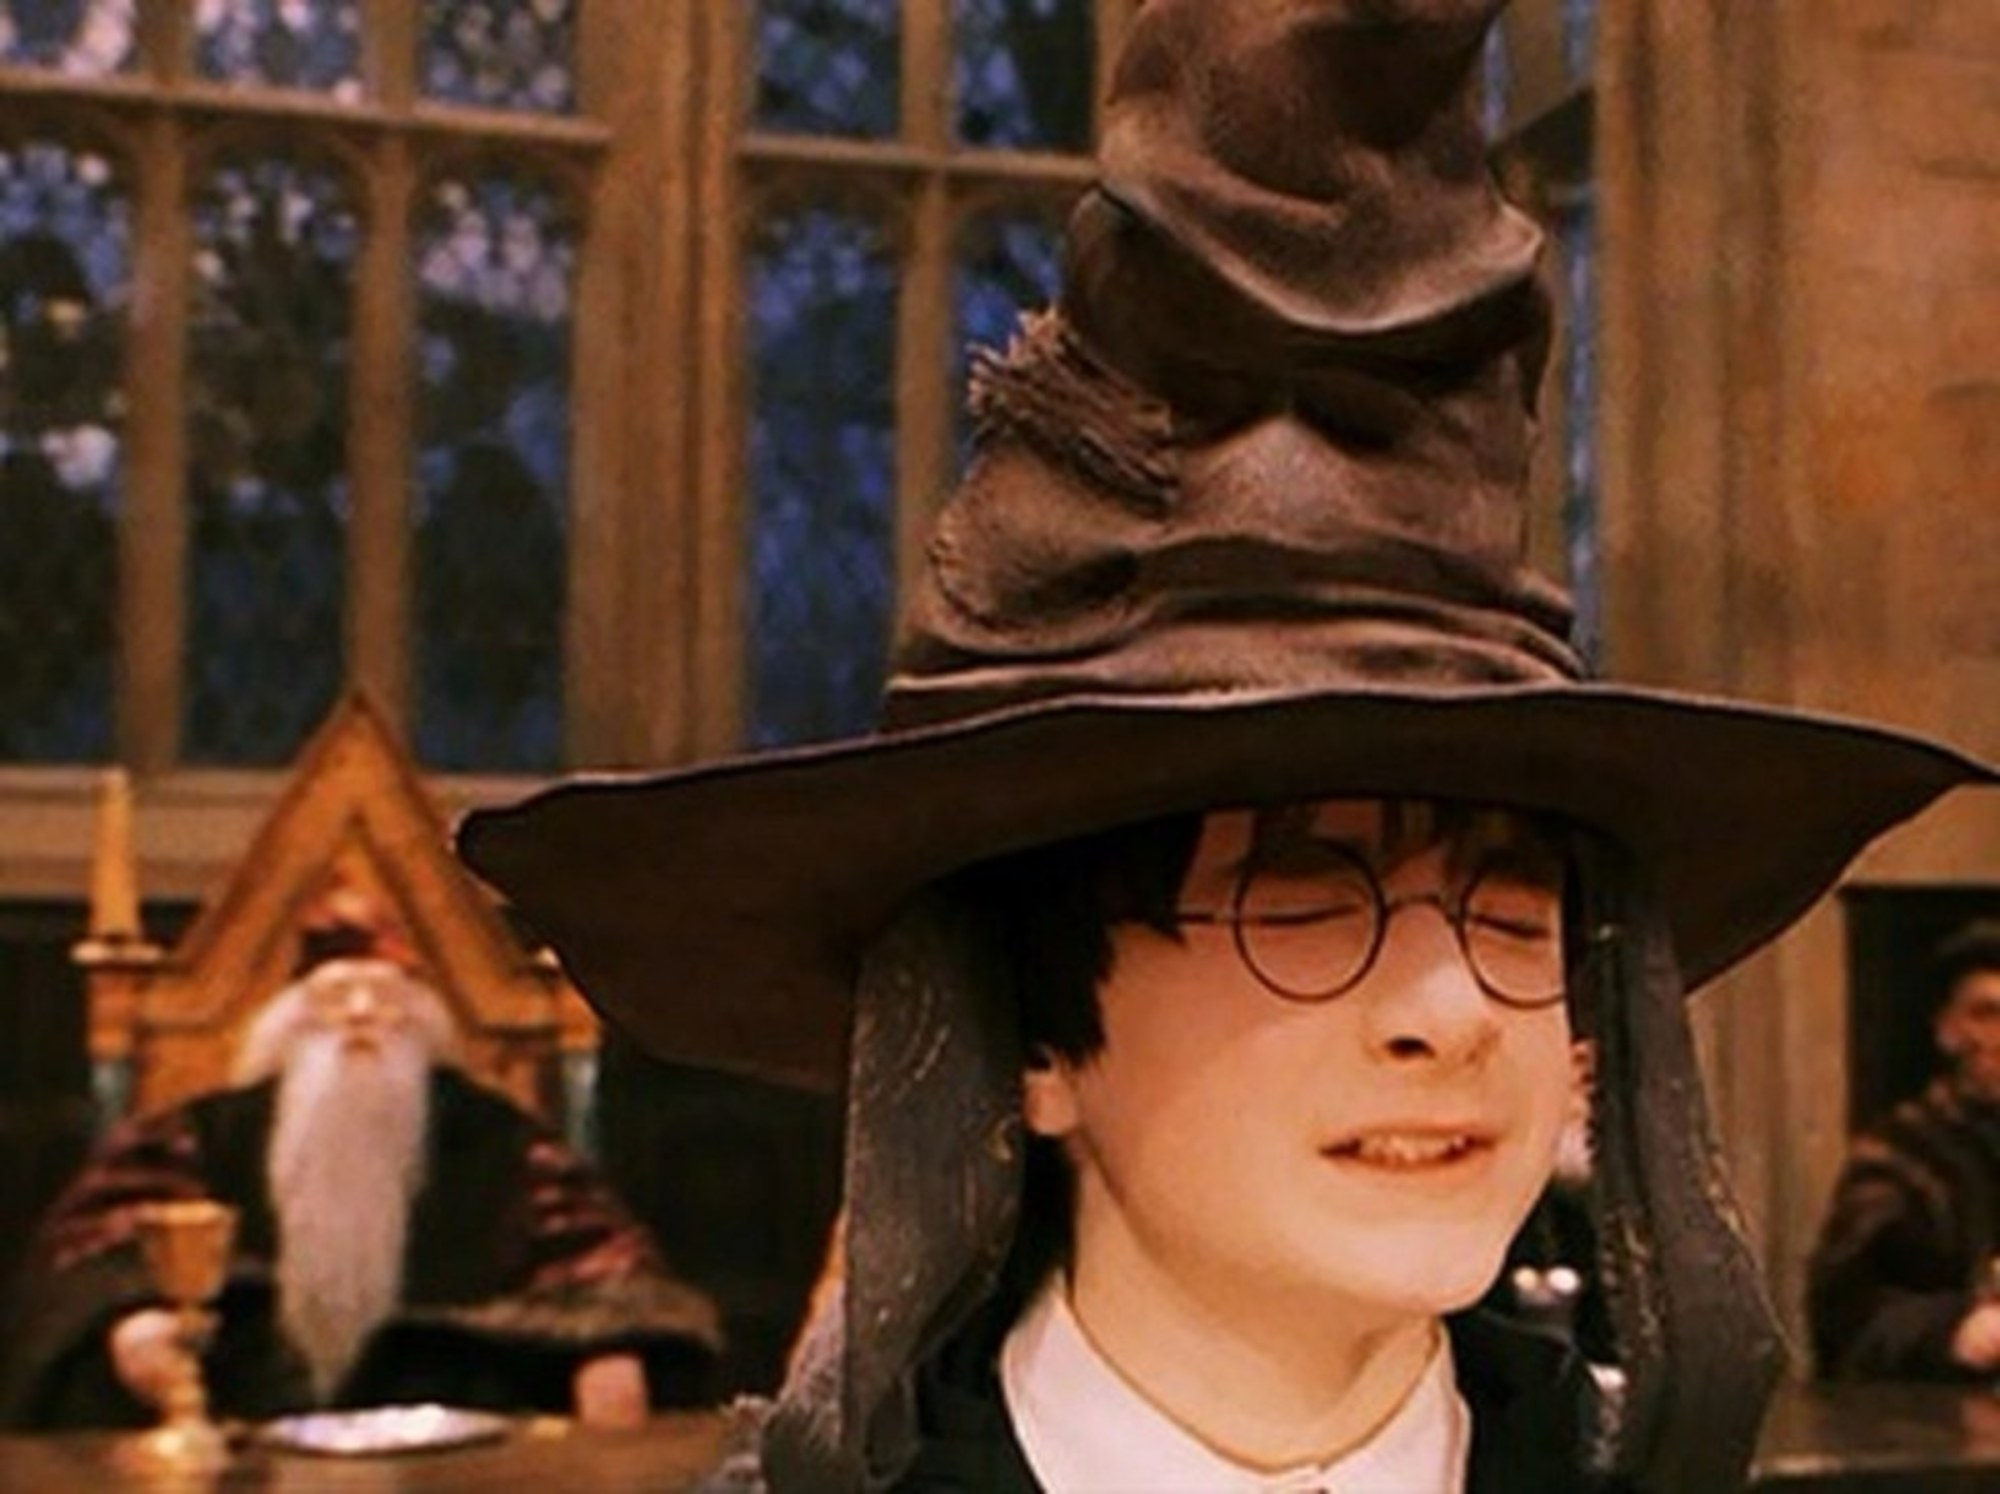

#### IMPORTS

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np  
import sys
import seaborn as sb
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import train_test_split
from scipy import optimize as op

## V.1 Data Analysis

#### DEFINITIONS

In [10]:
################################################
def my_mean(data) :
    result=float(0)
    for i in range(len(data)):
            if isnot_NaN(data[i]):
                result+=data[i]
    return float(result)/my_count(data) 
################################################
def my_std(data) :
    result=float(0)
    m=my_mean(data)
    for i in range(len(data)):
        if isnot_NaN(data[i]):
            result+= (data[i]-m)**2
    return float((result/my_count(data))**(1/2))
################################################
def my_dispersion(data) :
    m=my_mean(data)
    v=(my_std(data))**2
    return float((v/m))
################################################  
def my_element_counter(data,e):  
    count=0
    for x in data:
        
        if x==e:
            count= count +1        
    return count    
################################################  
def my_mode(data):  
    modecount=0
    for i in range(len(data)):
        count=my_element_counter(data,data[i])
        if count>modecount:
            result=data[i] 
            modecount=count
    return result
################################################  
def isnot_NaN(value) :
    if value==value:
        return True
################################################ 
def my_count(data) :
    i=0
    for j in range(len(data)):
        if isnot_NaN(data[j]):
            i+=1
    return i
################################################     
def my_notempty(data) :
    new=[]
    for i in range(len(data)):
        if isnot_NaN(data[i]):
            new.append(data[i])
    return new
################################################
def my_sort(data):

  ordered_data = []
  data_temp = data

  for i in range(0, len(data_temp)) :

      min_temp = data_temp[0]
      index = 0

      for j in range(0, len(data_temp)) :
          if (data_temp[j]<min_temp) :
              min_temp = data_temp[j]
              index = j

      ordered_data.append(min_temp)

      data_temp = data_temp[0:index] + data_temp[index+1:len(data_temp)]

  return ordered_data
################################################
def my_quartiles(data):
  datalength = len(data)
  min_data = data[0]
  quartile1 = data[int(datalength/4)-1]
  quartile2 = data[int(datalength/2)-1]
  quartile3 = data[int(datalength*3/4)-1]
  max_data = data[datalength-1]
  return [min_data, quartile1, quartile2, quartile3, max_data]

################################################
 
# normalizing on [-1, +1] any array of ordered non-all-equal numeric values

def my_norm(sorted_data):
    
    datalength = len(sorted_data)
    min_data = sorted_data[0]
    max_data = sorted_data[datalength-1]
    norm_factor = 2/(max_data-min_data)
    
    for i in range(datalength):
        sorted_data[i] = (sorted_data[i]-min_data)*norm_factor-1
        
    return(sorted_data)

################################################

# returning the number of values in [-1, -0.8], [-0.8, -0.6], ..., [0.8, 1] of a long (>10), ordered, normalized array of non-all-equal numerical values

def my_histogram(norm_data):
    
    datalength = len(norm_data)
    share_count = []
    share_values = []
    border_index = 0
        
    for j in range(9):
        share_values.append(0.2*(j)-0.8)
        for i in range(border_index, datalength):
            if (norm_data[i]>=share_values[j]) and (norm_data[i-1]<share_values[j]):
                share_count.append(i-border_index)
                border_index = i
                break
        
    share_count.append(datalength-border_index)
    return share_count

################################################

#### DESCRIBE

In [11]:
mydata=pd.read_csv("./dataset_train.csv")
justnumericaldata=mydata._get_numeric_data()
ColumnNames = justnumericaldata.columns[1:13]
rearranged_data = pd.DataFrame(index=['COUNT','MEAN', 'STD', 'DISPERSION', 'MODE', 'MIN','25%','50%','75%','MAX'], columns=ColumnNames)
for c in ColumnNames:    
    
    rearranged_data[c]["COUNT"]=my_count(my_sort(my_notempty(mydata[c])))              #COUNT
    rearranged_data[c]["MEAN"]=my_mean(my_sort(my_notempty(mydata[c])))              #MEAN 
    rearranged_data[c]["STD"]=my_std(my_sort(my_notempty(mydata[c])))                #STD
    rearranged_data[c]["DISPERSION"]=my_dispersion(my_sort(my_notempty(mydata[c])))                #DISPERSION
    rearranged_data[c]["MODE"]=my_mode(my_sort(my_notempty(mydata[c])))                #MODE
    rearranged_data[c]["MIN"]=(my_quartiles(my_sort(my_notempty(mydata[c]))))[0]     #MIN 
    rearranged_data[c]["25%"]=(my_quartiles(my_sort(my_notempty(mydata[c]))))[1]     #25% 
    rearranged_data[c]["50%"]=(my_quartiles(my_sort(my_notempty(mydata[c]))))[2]     #50%
    rearranged_data[c]["75%"]=(my_quartiles(my_sort(my_notempty(mydata[c]))))[3]     #75% 
    rearranged_data[c]["MAX"]=(my_quartiles(my_sort(my_notempty(mydata[c]))))[4]     #MAX
        

print(rearranged_data)

           Arithmancy Astronomy Herbology Defense Against the Dark Arts  \
COUNT            1566      1568      1567                          1569   
MEAN          49634.6   39.7971   1.14102                     -0.387863   
STD           16674.5   520.132   5.21802                       5.21113   
DISPERSION    5601.71   6797.92   23.8626                      -70.0141   
MODE            30403  -966.741  -10.2957                      -10.1621   
MIN            -24370  -966.741  -10.2957                      -10.1621   
25%             38491  -489.724  -4.31691                      -5.26333   
50%             49009   258.934   3.46678                      -2.61645   
75%             60761   524.393   5.41732                       4.89769   
MAX            104956   1016.21   11.6129                       9.66741   

           Divination Muggle Studies Ancient Runes History of Magic  \
COUNT            1561           1565          1565             1557   
MEAN          3.15391        -22

## V.2 Data Visualization

### V.2.1 Histogram

In [12]:
my_index=["[-1.0:0.8[","[-0.8:-0.6[","[-0.6:-0.4[","[-0.4:-0.2[","[-0.2:0.0[","[0.0:0.2[","[0.2:0.4[","[0.4:0.6[","[0.6:0.8[","[0.8:1.0]"]
Gryffindor_df=pd.DataFrame()
Slytherin_df=pd.DataFrame()
Ravenclaw_df=pd.DataFrame()
Hufflepuff_df=pd.DataFrame()

###############################################################################
for c in ColumnNames:

    Gryffindor_df[c]=my_histogram(my_norm(my_sort(my_notempty(mydata[mydata["Hogwarts House"]=="Gryffindor"][c].values))))
    Slytherin_df[c]=my_histogram(my_norm(my_sort(my_notempty(mydata[mydata["Hogwarts House"]=="Slytherin"][c].values))))
    Ravenclaw_df[c]=my_histogram(my_norm(my_sort(my_notempty(mydata[mydata["Hogwarts House"]=="Ravenclaw"][c].values))))
    Hufflepuff_df[c]=my_histogram(my_norm(my_sort(my_notempty(mydata[mydata["Hogwarts House"]=="Hufflepuff"][c].values))))

###############################################################################

Gryffindor_df=Gryffindor_df.set_index([my_index])
Slytherin_df=Slytherin_df.set_index([my_index])
Ravenclaw_df=Ravenclaw_df.set_index([my_index])
Hufflepuff_df=Hufflepuff_df.set_index([my_index])   

###############################################################################

cols = ['House of {}'.format(col) for col in ['Gryffindor', 'Slytherin', 'Ravenclaw', 'Hufflepuff']]
rows = ['{}'.format(row) for row in ColumnNames]

fig, axes = plt.subplots(nrows=13, ncols=4)
fig.suptitle(" Grades Distribution among Houses", fontsize=18)
for i, c in enumerate(Gryffindor_df.columns):
    Gryffindor_df[c].plot(kind='bar', ax=axes[i,0], figsize=(25, 25), color='r')
for i, c in enumerate(Gryffindor_df.columns):
    Slytherin_df[c].plot(kind='bar', ax=axes[i,1], figsize=(25, 25), color='g')
for i, c in enumerate(Gryffindor_df.columns):
    Ravenclaw_df[c].plot(kind='bar', ax=axes[i,2], figsize=(25, 25), color='b')
for i, c in enumerate(Gryffindor_df.columns):
    Hufflepuff_df[c].plot(kind='bar', ax=axes[i,3], figsize=(25, 25), color='y')

    
for ax, col in zip(axes[0], cols):
    ax.set_title(col)    
for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=1.4)

plt.savefig('histogram.png', bbox_inches='tight')    
 
plt.show()

### V.2.2 Scatter plot

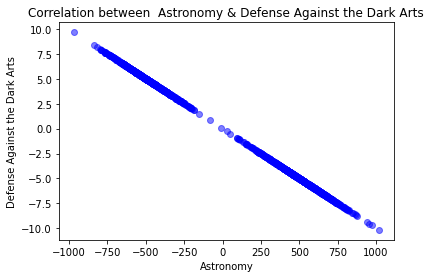

In [21]:
Astronomy_df=mydata["Astronomy"]
Defense_Against_the_Dark_Arts_df=mydata["Defense Against the Dark Arts"]
plt.scatter(Astronomy_df, Defense_Against_the_Dark_Arts_df, c='b', alpha=0.5)
plt.title("Correlation between  Astronomy & Defense Against the Dark Arts")
plt.xlabel("Astronomy")
plt.ylabel("Defense Against the Dark Arts")
plt.savefig('scatter.png', bbox_inches='tight') 
plt.show()

### V.2.3 Pair plot

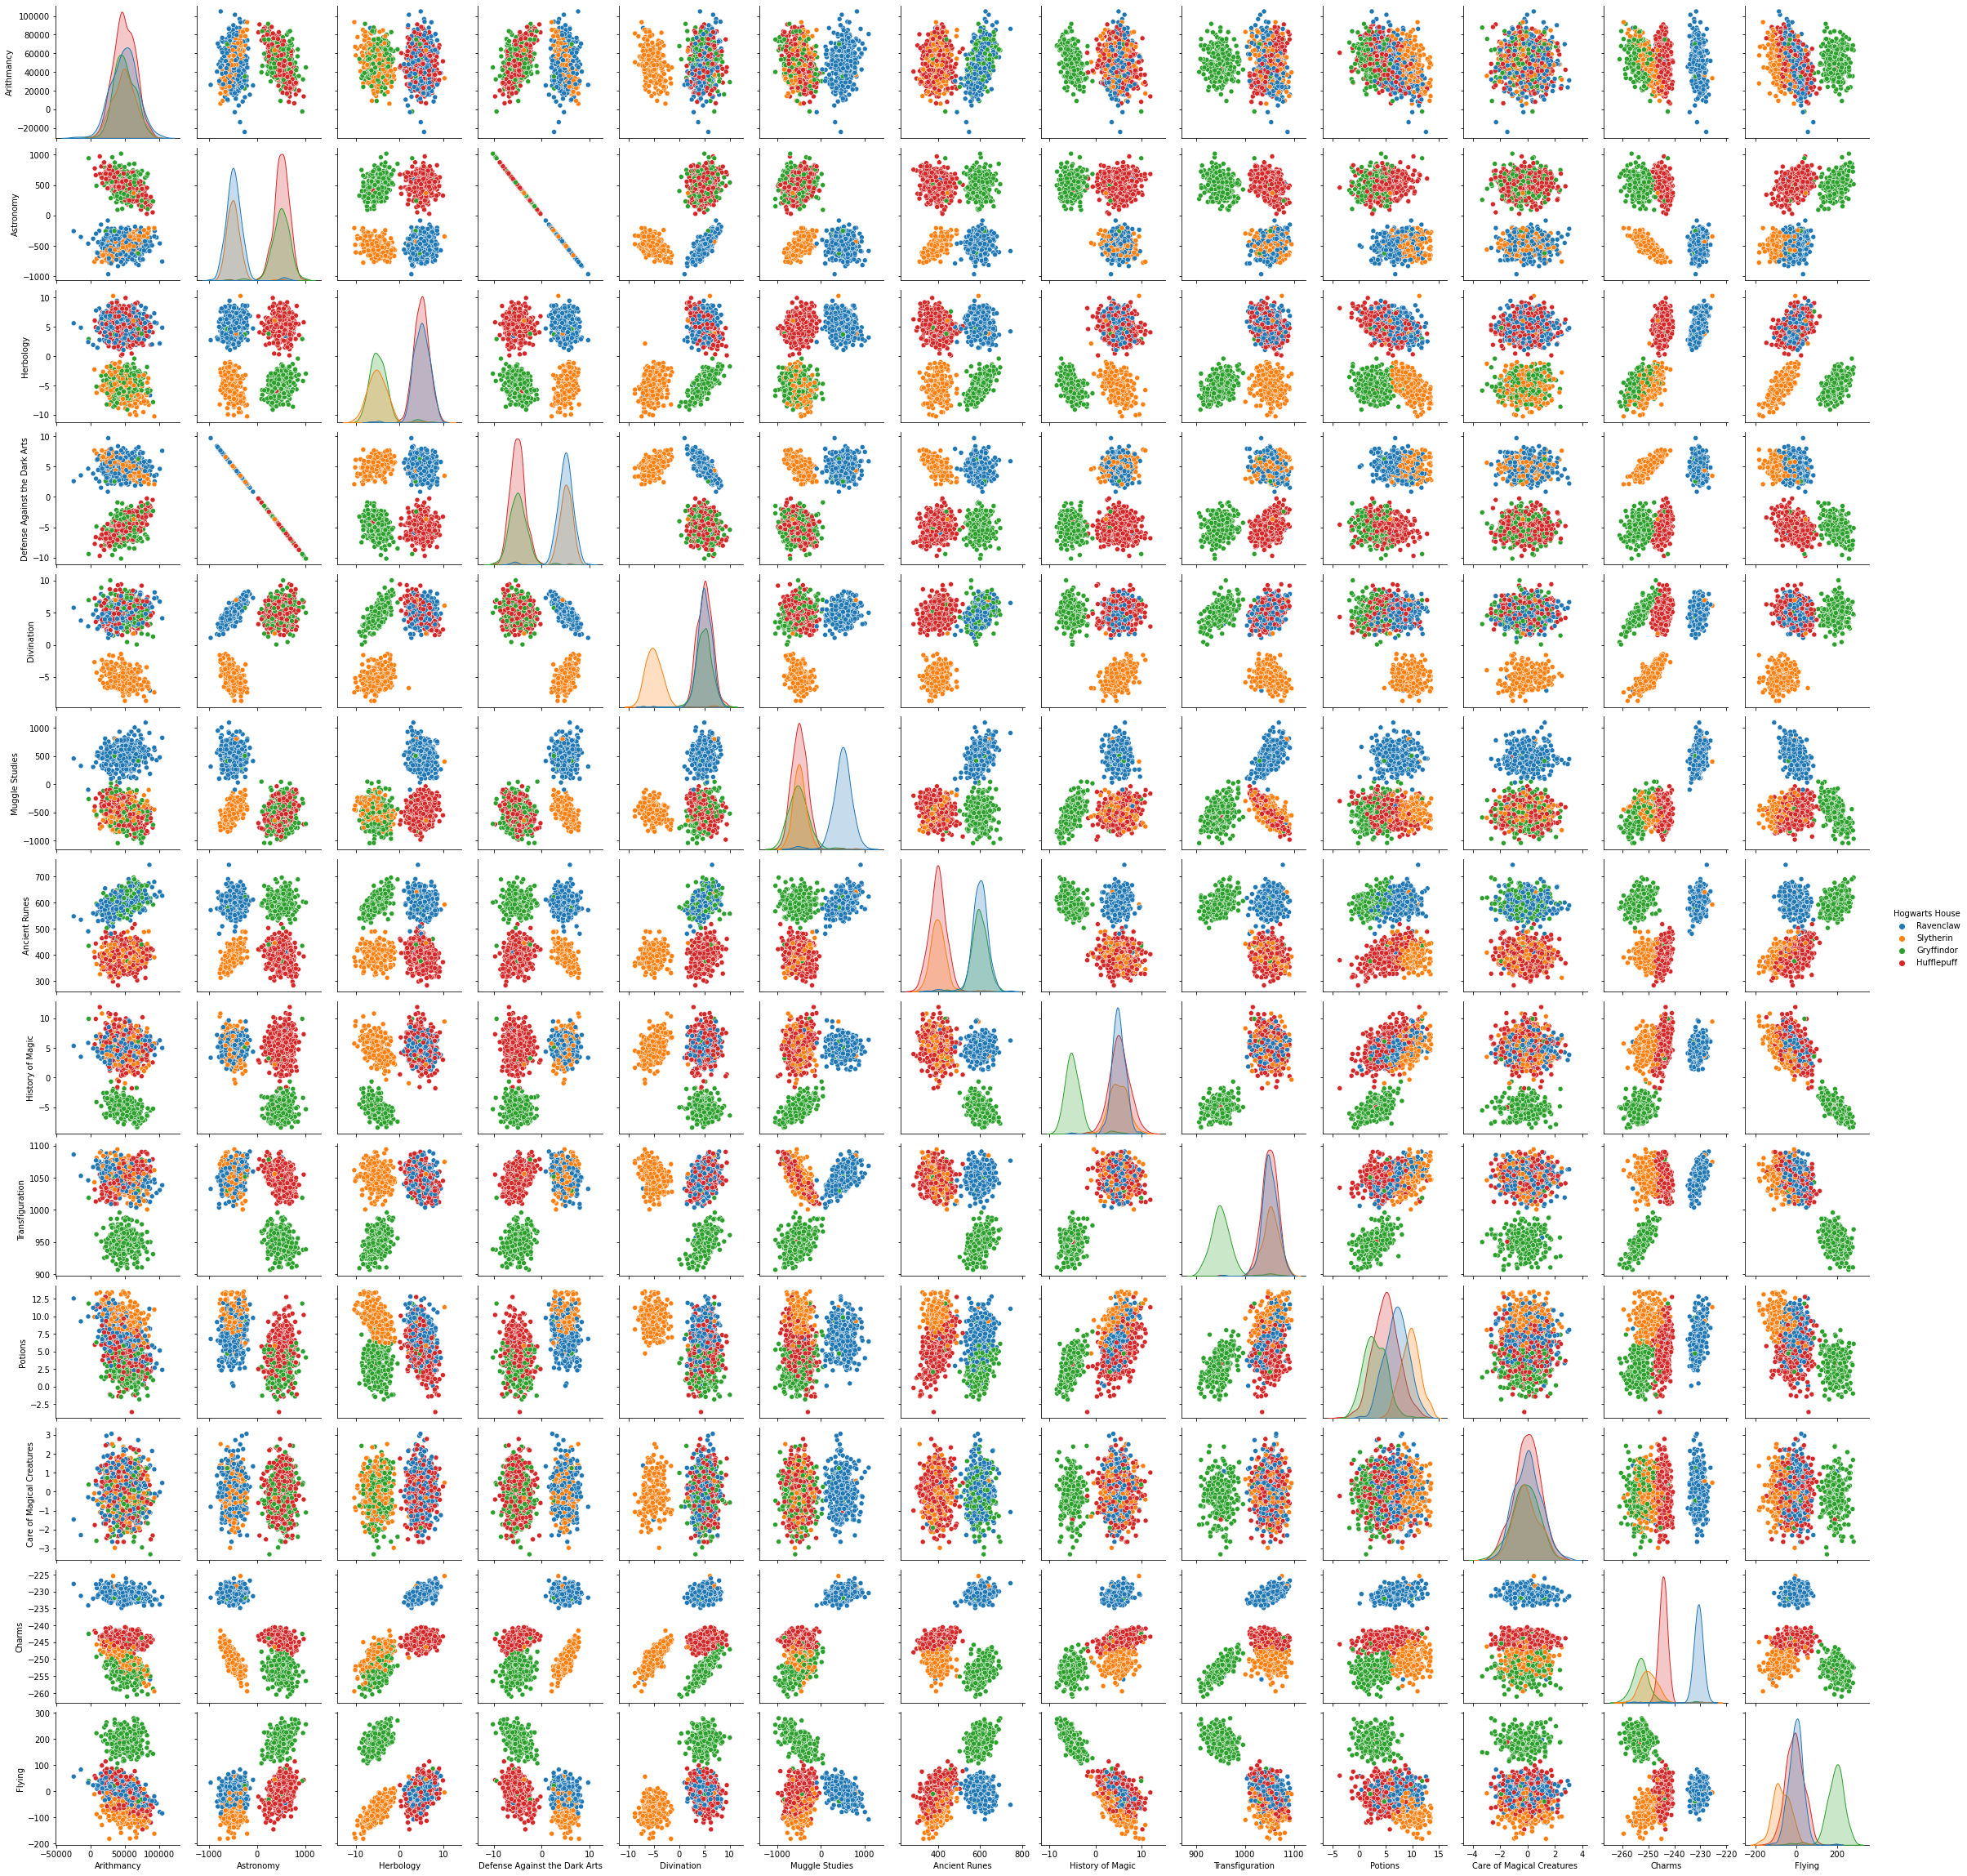

In [22]:
all_houses=pd.read_csv('dataset_train.csv')
all_houses=all_houses[['Hogwarts House', 'First Name', 'Last Name', 'Birthday',
       'Best Hand', 'Arithmancy', 'Astronomy', 'Herbology',
       'Defense Against the Dark Arts', 'Divination', 'Muggle Studies',
       'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions',
       'Care of Magical Creatures', 'Charms', 'Flying']]

all_houses=all_houses.dropna()
'''
for i in range(len(all_houses['Best Hand'])):
    if all_houses['Best Hand'].values[i]=='Right':
        all_houses['Best Hand'].values[i]=1
    else:
        all_houses['Best Hand'].values[i]=0
'''


sb.pairplot(all_houses, hue="Hogwarts House")
plt.savefig('pair.png', bbox_inches='tight') 
plt.show()

## V.3 Logistic Regression

### V.3.1 Train

The achieved accuracy is  98.41 %


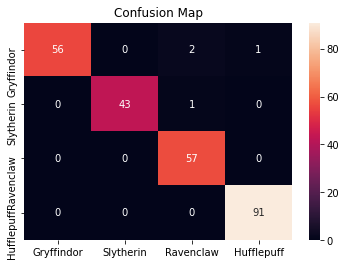

A file called "thetas.csv" has been saved in the working directory. You can use it for predictions


In [39]:
all_houses=pd.read_csv('dataset_train.csv')
all_houses=all_houses[['Hogwarts House', 'First Name', 'Last Name', 'Birthday',
       'Best Hand', 'Arithmancy', 'Astronomy', 'Herbology',
       'Defense Against the Dark Arts', 'Divination', 'Muggle Studies',
       'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions',
       'Care of Magical Creatures', 'Charms', 'Flying']]


all_houses=all_houses.dropna()

Hogwarts_House = ["Gryffindor","Slytherin","Ravenclaw","Hufflepuff"]

m = all_houses.shape[0]
n = 3
k = 4

X = np.ones((m,n + 1))
y = np.array((m,1))


X[:,1] = all_houses['Herbology'].values
X[:,2] = all_houses['Ancient Runes'].values
X[:,3] = all_houses['Defense Against the Dark Arts'].values
y = all_houses['Hogwarts House'].values


for j in range(n):
    X[:, j] = (X[:, j] - X[:,j].mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)


def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))


def regCostFunction(theta, X, y, _lambda = 0.1):
    m = len(y)
    h = sigmoid(X.dot(theta))
    reg = (_lambda/(2 * m)) * np.sum(theta**2)

    return (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))) + reg

def regGradient(theta, X, y, _lambda = 0.1):
    m, n = X.shape
    theta = theta.reshape((n, 1))
    y = y.reshape((m, 1))
    h = sigmoid(X.dot(theta))
    reg = _lambda * theta /m

    return ((1 / m) * X.T.dot(h - y)) + reg

def logisticRegression(X, y, theta):
    result = op.minimize(fun = regCostFunction, x0 = theta, args = (X, y),
                         method = 'TNC', jac = regGradient)
    
    return result.x


all_theta = np.zeros((k, n + 1))

i = 0
for house in Hogwarts_House:
    tmp_y = np.array(y_train == house, dtype = int)
    optTheta = logisticRegression(X_train, tmp_y, np.zeros((n + 1,1)))
    all_theta[i] = optTheta
    i += 1

Probabilities = sigmoid(X_test.dot(all_theta.T)) 
results = [Hogwarts_House[np.argmax(Probabilities[i, :])] for i in range(X_test.shape[0])]

print("The achieved accuracy is ", round(accuracy_score(y_test, results) * 100,2) , '%')



cfm = confusion_matrix(y_test, results, labels = Hogwarts_House)
sb.heatmap(cfm, annot = True, xticklabels = Hogwarts_House, yticklabels = Hogwarts_House)
plt.title('Confusion Map')
plt.show()


all_theta = pd.DataFrame(data=all_theta)
all_theta.to_csv('thetas.csv')
print('A file called "thetas.csv" has been saved in the working directory. You can use it for predictions')

## V.3.1 Predict

In [45]:
all_houses=pd.read_csv('dataset_test.csv')
names=all_houses[['Last Name','First Name']]
all_houses=all_houses[[ 'Herbology','Defense Against the Dark Arts', 'Ancient Runes']]



len(all_houses)
for i in range(len(all_houses)):
    for column in [ 'Herbology','Defense Against the Dark Arts', 'Ancient Runes']:
        if all_houses[column][i]!=all_houses[column][i]:
            all_houses[column][i]=(all_houses[column]).mean()




Hogwarts_House = ["Gryffindor","Slytherin","Ravenclaw","Hufflepuff"]
m = all_houses.shape[0]
n = 3



X = np.ones((m,n+1))
X[:,1] = all_houses['Herbology'].values
X[:,2] = all_houses['Ancient Runes'].values
X[:,3] = all_houses['Defense Against the Dark Arts'].values

for j in range(n):
    X[:, j] = (X[:, j] - X[:,j].mean())

    ##########################################################################################################

all_theta=pd.read_csv('./thetas.csv')

all_theta.drop(all_theta.columns[[1]], axis=1, inplace=True)
check=X.dot(all_theta.T)

Probabilities = sigmoid(X.dot(all_theta.T)) 
results = [Hogwarts_House[np.argmax(Probabilities[i, :])] for i in range(X.shape[0])]

houses=pd.DataFrame(results,columns=['Hogwarts House'])
houses.to_csv('houses.csv')

print("HMMMMMMMMM....")
print("Let me think")


print("       _            _.,----,")
print(" __  _.-._ / '-.        -  ,._  \)") 
print("|  `-)_   '-.   \       / < _ )/'' }") 
print("/__    '-.   \   '-, ___(c-(6)=(6)") 
print(" , `'.    `._ '.  _,'   >\    ''  )") 
print(" :;;,,'-._   '---' (  ( ''/`. -='/") 
print(";:;;:;;,  '..__    ,`-.`)'- '--'") 
print(";';:;;;;;'-._ /'._|   Y/   _/' \"") 
print("      '''._ F    |  _/ _.'._   `\"") 
print("             L    \   \/     '._  \'") 
print("      .-,-,_ |     `.  `'---,  \_ _|") 
print("      //    'L    /  \,   (''--',=`)7") 
print("     | `._       : _,  \  /'`-._L,_'-._") 
print("     '--' '-.\__/ _L   .`'         './/") 
print("                 [ (  /") 
print("                  ) `{") 
print("               \__)") 
    
print(" As the replacement of the Sorting Hat, I have decided the following ")
for i in range(len(houses)):
    print("[",i,"]",names['Last Name'][i]," ",names['First Name'][i]," should join house of ",houses['Hogwarts House'][i] )

print("       _            _.,----,")
print(" __  _.-._ / '-.        -  ,._  \)") 
print("|  `-)_   '-.   \       / < _ )/'' }") 
print("/__    '-.   \   '-, ___(c-(6)=(6)") 
print(" , `'.    `._ '.  _,'   >\    ''  )") 
print(" :;;,,'-._   '---' (  ( ''/`. -='/") 
print(";:;;:;;,  '..__    ,`-.`)'- '--'") 
print(";';:;;;;;'-._ /'._|   Y/   _/' \"") 
print("      '''._ F    |  _/ _.'._   `\"") 
print("             L    \   \/     '._  \'") 
print("      .-,-,_ |     `.  `'---,  \_ _|") 
print("      //    'L    /  \,   (''--',=`)7") 
print("     | `._       : _,  \  /'`-._L,_'-._") 
print("     '--' '-.\__/ _L   .`'         './/") 
print("                 [ (  /") 
print("                  ) `{") 
print("               \__)") 
    
    
print('A file called "houses.csv" has been saved in the working directory with all my decisions ')    

HMMMMMMMMM....
Let me think
       _            _.,----,
 __  _.-._ / '-.        -  ,._  \)
|  `-)_   '-.   \       / < _ )/'' }
/__    '-.   \   '-, ___(c-(6)=(6)
 , `'.    `._ '.  _,'   >\    ''  )
 :;;,,'-._   '---' (  ( ''/`. -='/
;:;;:;;,  '..__    ,`-.`)'- '--'
;';:;;;;;'-._ /'._|   Y/   _/' "
      '''._ F    |  _/ _.'._   `"
             L    \   \/     '._  '
      .-,-,_ |     `.  `'---,  \_ _|
      //    'L    /  \,   (''--',=`)7
     | `._       : _,  \  /'`-._L,_'-._
     '--' '-.\__/ _L   .`'         './/
                 [ (  /
                  ) `{
               \__)
 As the replacement of the Sorting Hat, I have decided the following 
[ 0 ] Sargent   Rico  should join house of  Hufflepuff
[ 1 ] Shackelford   Tamara  should join house of  Ravenclaw
[ 2 ] Crandall   Staci  should join house of  Gryffindor
[ 3 ] Gavin   Dee  should join house of  Hufflepuff
[ 4 ] Gustafson   Gregory  should join house of  Hufflepuff
[ 5 ] Ebert   Katharine  should join house of  Slythe